In [1]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

In [2]:
ticket_list_affecting=['^GSPC','DX-Y.NYB','CL=F','GC=F','SI=F','^TNX','^VIX']
ticket_name= ["S&P 500","US Dollar Index","Crude Oil",'Gold',"Silver",'10 Years Treasury Yield','US Volatility Index']
ticket_name=ticket_name[::-1]
df_list=[]

for i in ticket_list_affecting:
    
    yahoo_financials = YahooFinancials(i)
    data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                      end_date='2022-12-31', 
                                                      time_interval='daily')
    df_list.append(pd.DataFrame(data[i]['prices']).loc[:,['formatted_date','adjclose']].rename(columns={'adjclose':ticket_name.pop()}))

In [3]:
len(df_list)

7

In [4]:
df=df_list.pop()
df.head()

,formatted_date,US Volatility Index
0,2000-01-03,24.209999
1,2000-01-04,27.010000
2,2000-01-05,26.410000
3,2000-01-06,25.730000
4,2000-01-07,21.719999


In [5]:
len(df_list)

6

In [6]:
for i in df_list:
    df=df.merge(i,on='formatted_date',how='inner')

In [7]:
df

,formatted_date,US Volatility Index,S&P 500,US Dollar Index,Crude Oil,Gold,Silver,10 Years Treasury Yield
0,2000-08-30,17.690001,1502.589966,112.139999,33.400002,273.899994,4.930000,5.800
1,2000-08-31,16.840000,1517.680054,112.599998,33.099998,278.299988,5.003000,5.729
2,2000-09-01,17.530001,1520.770020,111.419998,33.380001,277.000000,5.004000,5.675
3,2000-09-05,19.820000,1507.079956,112.410004,33.799999,275.799988,4.998000,5.683
4,2000-09-06,20.790001,1492.250000,114.120003,34.950001,274.200012,4.983000,5.712
...,...,...,...,...,...,...,...,...
5497,2022-07-12,27.290001,3818.800049,108.070000,95.839996,1723.300049,18.899000,2.958
5498,2022-07-13,26.820000,3801.780029,107.959999,96.300003,1734.199951,19.138000,2.904
5499,2022-07-14,26.400000,3790.379883,108.540001,95.779999,1704.500000,18.169001,2.960
5500,2022-07-15,24.230000,3863.159912,108.059998,97.589996,1702.400024,18.548000,2.930


In [8]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['S&P 500'], axis=1)
    target = df_Stock['S&P 500']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.8)
    print('Training Set length - ', str(train_split))

    print('Test Set length - ', str(int(data_len * 0.2)))

    # Splitting features and target into train, validation and test samples 
    X_train,X_test = features[:train_split], features[train_split:]
    Y_train,Y_test = target[:train_split], target[train_split:]
    
    return X_train, X_test, Y_train, Y_test

In [9]:
X_train, X_test, Y_train, Y_test = create_train_test_set(df.drop(columns='formatted_date').dropna())

Historical Stock Data length is -  5479
Training Set length -  4383
Test Set length -  1095


In [10]:
# Prediction using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-22.79408283  13.33411938   0.95799278   1.78796602 -60.0420643
  63.05637287]
LR Intercept: 
 -299.5552638439308


In [12]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.7366551565143509


In [13]:
#Predict for the test dataset
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [14]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.74
Training Explained Variation:  0.74
Training Mean Squared Error: 54668.91
Training RMSE:  233.81
Training MAE:  187.97
 
Test R-squared:  -2.3
Test Explained Variation:  0.23
Test Mean Squared Error: 1532340.14
Test RMSE:  1237.88
Test MAE:  1084.15


In [15]:
import numpy as np

In [16]:
predicted=np.concatenate([Y_train_pred,Y_test_pred])

In [17]:
actual=np.concatenate([Y_train, Y_test])

In [18]:
df_pred=pd.DataFrame()

In [19]:
df_pred['Actual']=actual
df_pred['Predicted']=predicted

<AxesSubplot:>

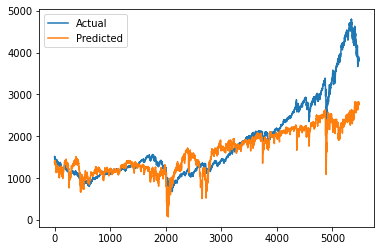

In [20]:
df_pred.plot()